<a href="https://colab.research.google.com/github/Pakhi27/Movie-Recommendation-Neural-Networks/blob/main/Movie_recommendation_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df_ratings = pd.read_csv('ratings.csv')
df_movies = pd.read_csv('movies.csv')

# Assuming 'movie_id' is the common column
merged_df = pd.merge(df_ratings, df_movies, on='movieId')

In [3]:
dataset=pd.DataFrame(merged_df)

In [4]:
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1.439474e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1.573939e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,8.307862e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,8.354447e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
290998,2006,185973,1.5,1.522201e+09,Breathing Lessons (1994),(no genres listed)
290999,2006,186901,3.5,1.523597e+09,Hidden Places (2006),Drama|Romance
291000,2008,141452,4.0,1.451471e+09,Clannad: The Motion Picture (2007),Animation|Drama
291001,2009,1555,5.0,9.415140e+08,"To Have, or Not (En avoir (ou pas)) (1995)",Drama


In [5]:
merged_df.isnull()

,userId,movieId,rating,timestamp,title,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
290998,False,False,False,False,False,False
290999,False,False,False,False,False,False
291000,False,False,False,False,False,False
291001,False,False,False,False,False,False


<Axes: >

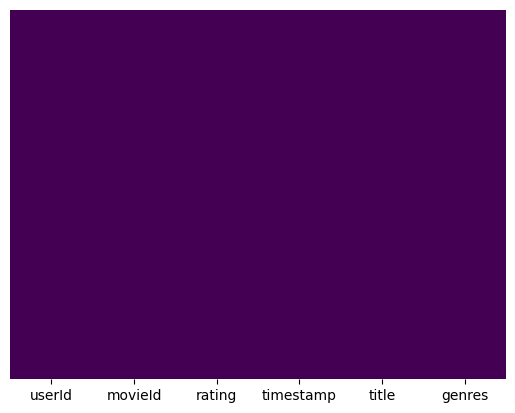

In [6]:
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    1
title        0
genres       0
dtype: int64

In [8]:
# This code first selects rows where the "timestamp" value is null using .isnull() on the Series. The resulting boolean Series is then used to filter the original DataFrame df.
null_timestamps = merged_df[merged_df['timestamp'].isnull()]

# Print those rows (optional)
print(null_timestamps)

       userId  movieId  rating  timestamp                title  \
51318    2010      541     5.0        NaN  Blade Runner (1982)   

                       genres  
51318  Action|Sci-Fi|Thriller  


In [9]:
merged_df_dropna = merged_df.dropna(subset=['timestamp'])


In [10]:
# Alternatively, count the number of dropped rows
dropped_rows = merged_df.shape[0] - merged_df_dropna.shape[0]
print(f"Number of rows dropped with null timestamps: {dropped_rows}")

Number of rows dropped with null timestamps: 1


In [11]:
merged_df_dropna.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [17]:


# Assuming your data is loaded into a pandas DataFrame named 'df'
merged_df = merged_df.head(20000)  # Get the first 20,000 rows



In [18]:
merged_df

,userId,movieId,rating,timestamp,title,genres
104826,1006,122914,4.0,1.570738e+09,Avengers: Infinity War - Part II (2019),Action|Adventure|Sci-Fi
145637,1481,434,2.0,1.357832e+09,Cliffhanger (1993),Action|Adventure|Thriller
235759,707,2169,4.0,9.828156e+08,Dead Man on Campus (1998),Comedy
165555,1319,1673,4.5,1.112112e+09,Boogie Nights (1997),Drama
91765,906,69844,4.5,1.563381e+09,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX
...,...,...,...,...,...,...
211391,31,965,3.5,1.256226e+09,"39 Steps, The (1935)",Drama|Mystery|Thriller
225286,57,60766,4.5,1.260846e+09,Man on Wire (2008),Documentary
103298,1400,114180,3.5,1.462615e+09,"Maze Runner, The (2014)",Action|Mystery|Sci-Fi
268934,355,177615,5.0,1.535847e+09,Lady Bird (2017),Comedy


In [ ]:
# EDA

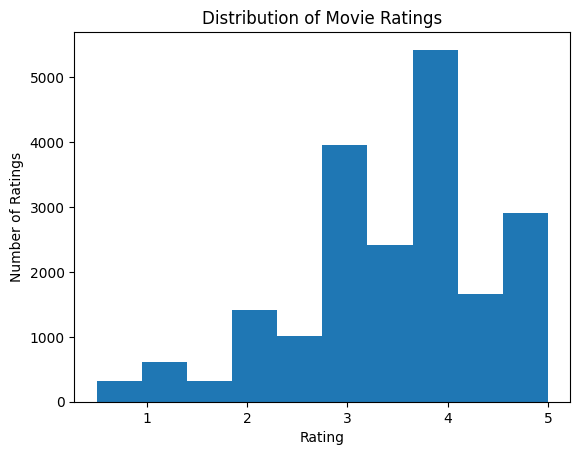

In [19]:
# Distribution of Ratings:
plt.hist(merged_df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.show()

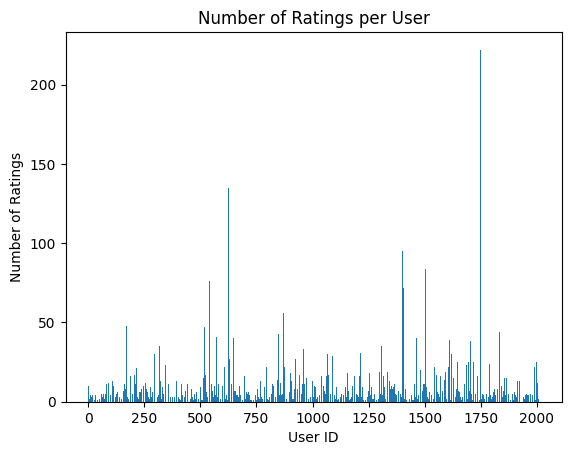

In [20]:
# Number of Ratings per User:
user_ratings_count = merged_df.groupby('userId')['rating'].count()
plt.bar(user_ratings_count.index, user_ratings_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User')
plt.show()

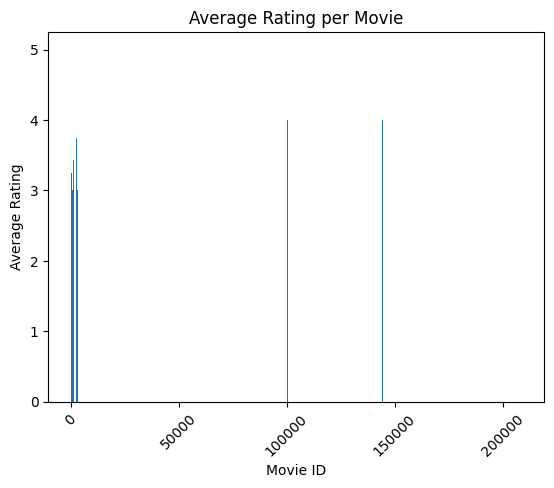

In [21]:
# . Average Rating per Movie:
avg_rating_per_movie = merged_df.groupby('movieId')['rating'].mean()
plt.bar(avg_rating_per_movie.index, avg_rating_per_movie.values)
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Average Rating per Movie')
plt.xticks(rotation=45)  # Rotate movie ID labels for readability
plt.show()

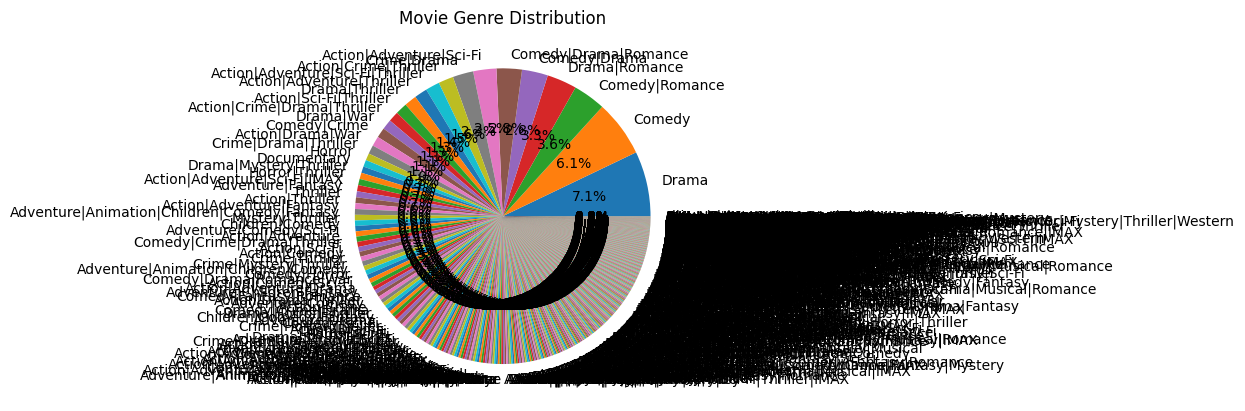

In [22]:
# Movie Genre Distribution
genre_counts = merged_df['genres'].value_counts()
plt.pie(genre_counts.values, labels=genre_counts.index, autopct="%1.1f%%")
plt.title('Movie Genre Distribution')
plt.show()


In [ ]:
# Preprocessing

In [23]:
# Lowercase: Convert all characters to lowercase for consistency.
merged_df['title'] = merged_df['title'].str.lower()


<ipython-input-23-5224acf925e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['title'] = merged_df['title'].str.lower()


In [24]:
# Remove Punctuation: Use regular expressions to remove punctuation marks.
import re
pattern = r'[^\w\s]'  # Replace anything that's not alphanumeric or whitespace
merged_df['title'] = merged_df['title'].str.replace(pattern, '')


<ipython-input-24-ef76579e847a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['title'] = merged_df['title'].str.replace(pattern, '')


In [25]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer model

# Tokenize: Split the title into individual words.
merged_df['title'] = merged_df['title'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-25-79639f607a04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['title'] = merged_df['title'].apply(word_tokenize)


In [26]:
import nltk


In [27]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
# Stop Word Removal (optional): Remove common words that don't contribute much meaning.
stop_words = set(stopwords.words('english'))  # Load English stop words

def remove_stopwords(tokens):
  filtered_words = [word for word in tokens if word not in stop_words]
  return filtered_words

merged_df['title'] = merged_df['title'].apply(remove_stopwords)


<ipython-input-28-77f564cf662a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['title'] = merged_df['title'].apply(remove_stopwords)


In [29]:
merged_df['title'] = merged_df['title'].apply(lambda x: ' '.join(x))

<ipython-input-29-a1ea0a807608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['title'] = merged_df['title'].apply(lambda x: ' '.join(x))


In [ ]:
# . Preprocess Genre Column (similar approach):
# Lowercase and remove punctuation.
# Split the genre string into individual genres (if genres are comma-separated).
# Apply tokenization, stop word removal (optional), and joining back into a string (optional) similar to the title processing steps.

In [30]:
merged_df['genres'] = merged_df['genres'].str.lower()
merged_df['genres'] = merged_df['genres'].str.replace(pattern, '')

merged_df['genres'] = merged_df['genres'].apply(word_tokenize)
merged_df['genres'] = merged_df['genres'].apply(remove_stopwords)  # Optional stop word removal

# Optional: Join tokens back if genre was a single string
merged_df['genres'] = merged_df['genres'].apply(lambda x: ' '.join(x))


<ipython-input-30-366f5f62f285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genres'] = merged_df['genres'].str.lower()
<ipython-input-30-366f5f62f285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genres'] = merged_df['genres'].str.replace(pattern, '')
<ipython-input-30-366f5f62f285>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# Applying Collaborative Filtering using RBM

In [ ]:
# Collaborative filtering (CF) is a technique used in recommender systems to predict a user's preferences for items (movies, music, products, etc.) based on the preferences of other similar users. It's like asking your friends for recommendations because they have similar tastes to you. Here's a breakdown of how it works:

# **1. Data Collection:**

# * The recommender system gathers data on user interactions with items. This data can include explicit ratings (1-5 stars), implicit feedback (purchase history, browsing behavior), or a combination of both.

# **2. User Similarities:**

# * The system analyzes the user data to identify users with similar tastes. This can be done using various techniques, such as:
#     * **Item-based similarity:** Users who have rated similar items highly are considered similar.
#     * **User-based similarity:** Users who have given similar ratings to a large number of items are considered similar.

# **3. Recommendations:**

# * Once user similarities are established, the system can predict a user's preference for an item they haven't interacted with before. Here's how:
#     * **Item-based CF:**
#         * Identify the most similar users who rated the new item highly.
#         * Recommend the new item based on the high ratings from similar users.
#     * **User-based CF:**
#         * Find the items that similar users have rated highly.
#         * Recommend those items to the target user.

# **Benefits of Collaborative Filtering:**

# * **Effective for new items:** CF can recommend new items effectively, even if they don't have many ratings yet, by leveraging the preferences of similar users.
# * **Scalability:** CF can handle large datasets with many users and items.
# * **Interpretability:** In some cases, CF recommendations can be easier to interpret because they are based on user similarities.

# **Drawbacks of Collaborative Filtering:**

# * **Cold start problem:** New users or items with limited data can be challenging to recommend for.
# * **Sparsity:** If user-item interactions are sparse (many users haven't rated many items), CF accuracy can suffer.
# * **Filter bubbles:** CF can reinforce existing preferences and limit exposure to diverse recommendations.

# Overall, collaborative filtering is a powerful technique for building recommender systems. It can leverage the collective intelligence of users to provide personalized recommendations, enhancing user experience in various domains.

In [ ]:
# Algorithm Implementation: Surprise implements a variety of recommender system algorithms, including Collaborative Filtering (CF) techniques like Matrix Factorization (SVD in this case) and Neighborhood-Based approaches. It also provides functionalities for Content-Based Filtering algorithms.
# Evaluation Metrics: Surprise includes support for various evaluation metrics commonly used in recommender systems, such as Root Mean Squared Error (RMSE) and Precision-Recall curves.
# Model Tuning and Optimization: Surprise allows you to tune hyperparameters of recommender system algorithms to optimize their performance for your specific dataset.



In [31]:
!pip install surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357249 sha256=da9f83a80d9e2c418fe07019e374a062794f3fc3fe7a7973b03e844fa9d74786
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# 1. User Latent Factors:

# user_factors = rbm.transform(train_data.build_full_trainset().sparsify()):
# This line uses the trained RBM model (rbm) to transform the training data (train_data) into user latent factors.
# train_data.build_full_trainset().sparsify() converts the training data into a sparse matrix, which can be more memory-efficient for RBM calculations.
# The resulting user_factors is a NumPy array containing the learned latent factors (hidden layer activations) for each user. These latent factors represent the underlying characteristics users share based on their ratings.
# 2. Recommend Items Function:

# def recommend_items(user_id, user_factors, item_factors, k=10)::
# This function takes several arguments:
# user_id: The ID of the user for whom recommendations are generated.
# user_factors: The NumPy array containing user latent factors (as obtained from the RBM).
# item_factors: The NumPy array containing item latent factors (explained later).
# k (optional): The number of top recommendations to return (defaults to 10).
# The function performs the following steps:
# user_factor = user_factors[user_id]: This retrieves the user latent factor for the specified user_id from the user_factors array.
# item_similarities = np.dot(user_factor, item_factors.T):
# This calculates the item similarities between the user (represented by their latent factor) and all items (represented by their latent factors in item_factors).
# It uses the dot product operation (np.dot) between the user factor and the transposed item factors (item_factors.T).
# top_k_indices = np.argsort(item_similarities)[-k:]:
# This identifies the indices of the k most similar items based on the calculated similarities in item_similarities.
# np.argsort sorts the similarities in descending order, and [-k:] selects the last k elements (top k indices).
# return list(top_k_indices): The function returns a list containing the movie IDs (represented by their indices) of the top-k recommended items for the user.
# 3. Item Latent Factors:

# item_factors = user_factors.T:
# This line assumes that the user latent factors also represent item latent factors in this specific implementation.
# It simply transposes the user_factors array to get the item_factors.
# In some RBM implementations or collaborative filtering approaches, item latent factors might be learned separately.
# 4. Example Usage:

# user_id = 1: This assigns the user ID for whom recommendations are to be generated.
# recommendations = recommend_items(user_id, user_factors, item_factors): This calls the recommend_items function to get recommendations for the specified user.
# print(f"Top-10 recommendations for user {user_id}: {recommendations}"): This prints the top-10 recommended movie IDs for the user.



In [47]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from collections import defaultdict

# Helper function to convert ratings to binary for RBM
def binarize_ratings(ratings, threshold=3.5):
  """Converts ratings to binary based on a threshold.

  Args:
      ratings (pd.DataFrame): DataFrame containing user-movie ratings.
      threshold (float, optional): Threshold for converting ratings to binary (1 if above, 0 otherwise). Defaults to 3.5.

  Returns:
      pd.DataFrame: DataFrame with binary ratings (1 or 0).
  """
  binary_ratings = ratings.copy()
  binary_ratings[ratings.rating >= threshold] = 1
  binary_ratings[ratings.rating < threshold] = 0
  return binary_ratings

# Load data (assuming 'ratings.csv' exists)
df_ratings = pd.read_csv('ratings.csv')
df_ratings = df_ratings.head(20000)  # Get the first 20,000 rows

# Preprocess data (e.g., handle missing values)
# ... (your data cleaning steps here)

# Binarize ratings (optional)
df_ratings_binary = binarize_ratings(df_ratings)  # Adjust threshold if needed



In [48]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_ratings_binary, test_size=0.2, random_state=42)
# Define a reader object for Surprise library
reader = Reader(rating_scale=(0, 1))  # Adjust for binary ratings (0 or 1)

# Load training data into Surprise Dataset format
train_data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader=reader)

In [49]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [37]:
# This code first selects rows where the "timestamp" value is null using .isnull() on the Series. The resulting boolean Series is then used to filter the original DataFrame df.
null_timestamps = df_ratings[df_ratings['timestamp'].isnull()]

# Print those rows (optional)
print(null_timestamps)

         userId  movieId  rating  timestamp
1782846   11851       52     NaN        NaN


In [38]:
# This code first selects rows where the "timestamp" value is null using .isnull() on the Series. The resulting boolean Series is then used to filter the original DataFrame df.
null_timestamps = df_ratings[df_ratings['rating'].isnull()]

# Print those rows (optional)
print(null_timestamps)

         userId  movieId  rating  timestamp
1782846   11851       52     NaN        NaN


In [39]:
df_ratings = df_ratings.dropna(subset=['timestamp'])

In [40]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [50]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
19995,166,1213,4.0,9.493737e+08
19996,166,1219,4.0,9.516017e+08
19997,166,1220,2.0,9.420157e+08
19998,166,1225,5.0,9.516005e+08


In [52]:
from sklearn.neural_network import BernoulliRBM

from scipy.sparse import csr_matrix

# Assuming your data is in a pandas DataFrame named 'df_ratings' with columns:
#   - userId (user ID)
#   - movieId (movie ID)
#   - rating (rating value)

# Extract user IDs, movie IDs, and ratings
user_ids = df_ratings['userId'].to_numpy()
movie_ids = df_ratings['movieId'].to_numpy()
ratings = df_ratings['rating'].to_numpy()

# Create a sparse CSR matrix with (user, movie) as indices and ratings as values
sparse_ratings_matrix = csr_matrix((ratings, (user_ids, movie_ids)))

# Now you can use 'sparse_ratings_matrix' to train your RBM model
rbm = BernoulliRBM(random_state=42, n_components=10, learning_rate=0.01)
rbm.fit(sparse_ratings_matrix)

# Get user latent factors (hidden layer activations)
user_factors = rbm.transform(sparse_ratings_matrix)

In [68]:
#  Item-based collaborative filtering with cosine similarity
# def recommend_items(user_id, user_factors, item_factors, k=10):
  # """Recommends top-k items for a user based on cosine similarity.

  # Args:
  #     user_id (int): User ID for whom recommendations are generated.
  #     user_factors (np.ndarray): User latent factors from the RBM model.
  #     item_factors (np.ndarray): Item latent factors from the RBM model (obtained by transposing user_factors).
  #     k (int, optional): Number of top recommendations to return. Defaults to 10.

  # Returns:
  #     list: List of movie IDs for the top-k recommendations.

def recommend_items(user_id, user_factors, item_factors, k=10):
    # ... (existing function code)
    user_factor = user_factors[user_id, :]  # Select the user's row
    # item_factors = user_factor.T
    item_similarities = np.dot(user_factor, item_factors)
    top_k_indices = np.argsort(item_similarities)[-k:]
    return list(top_k_indices)

# Get item latent factors within the function during recommendation
user_id = 1
recommendations = recommend_items(user_id, user_factors, item_factors)
# movie-id's
print(f"Top-10 recommendations for user {user_id}: {recommendations}")



# Evaluation (using Surprise library for RMSE on test data)
# ... (you can use Surprise's functionality to evaluate on the test set)


Top-10 recommendations for user 1: [53, 54, 55, 56, 57, 58, 59, 60, 62, 166]


In [69]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [72]:


import numpy as np

min_id = df_ratings['movieId'].min()  # Access column 'movieId' directly
max_id = df_ratings['movieId'].max()  # Access column 'movieId' directly

print(f"Movie ID range: {min_id} to {max_id}")


Movie ID range: 1 to 205106


In [ ]:
# New movie recommendation..

In [73]:
def preprocess_title(title):
  """Preprocesses a title string for further use.

  Args:
      title (str): The title string to preprocess.

  Returns:
      str: The preprocessed title string.
  """

  # Lowercase
  title = title.lower()  # Convert all characters to lowercase

  # Remove punctuation (optional)

  import string
  punctuation = set(string.punctuation)
  title = ''.join([char for char in title if char not in punctuation])

  # Remove stop words (optional)

  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  title = ' '.join([word for word in title.split() if word not in stop_words])

  # Stemming or Lemmatization (optional)

  from nltk.stem import PorterStemmer
  stemmer = PorterStemmer()
  title = stemmer.stem(title)

  # ... (add more preprocessing steps as needed)

  return title


In [74]:
from surprise import KNNBaseline

# Assuming your DataFrame is named 'df_movies' with columns:
#   - title (movie title)
#   - genres (list of genres for each movie)


# Preprocess the new movie title
new_movie_title_processed = preprocess_title('October')

# Create a KNNBaseline recommender with cosine similarity
knn = KNNBaseline(sim_options={'name': 'cosine', 'k': 10})  # Adjust k for number of neighbors


In [85]:
!pip install --upgrade surprise

In [87]:
!pip show surprise

Name: surprise
Version: 0.1
Summary: An easy-to-use library for recommender systems.
Home-page: http://surpriselib.com
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: scikit-surprise
Required-by: 


In [86]:
from surprise import Rating

ImportError: cannot import name 'Rating' from 'surprise' (/usr/local/lib/python3.10/dist-packages/surprise/__init__.py)

In [81]:

new_movie_genres = ['Drama']  # Replace with actual genres

# Combine processed title and genres (if available)
new_movie_data = {'title': new_movie_title_processed, 'genres': new_movie_genres}  # Dictionary for new movie data

# Get a user ID (if applicable) for the new movie (replace with appropriate value)
new_user_id = 999  # Replace with actual user ID

# Create a new rating object with dummy rating (since we don't have an actual rating)
new_rating = Rating(new_user_id, new_movie_title_processed, 0)  # Dummy rating of 0

# Get test set with the new movie data
testset = list([new_rating])  # Convert the rating object to a list

# Get recommendations
predictions = knn.test(testset)

# Print top recommendations
for pred in predictions:
  # Access recommended movie ID and use it to retrieve details from your data (e.g., title, genres)
  recommended_movie_id = pred.iid
  print(f"Recommended movie ID: {recommended_movie_id}")  # You'll need to map this ID to actual movie information



NameError: name 'Rating' is not defined